## Regression Project: Boston House Prices

In [1]:
# Load libraries
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
# from sklearn import cross_validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pandas.read_csv(url, delim_whitespace=True, names=names)

In [3]:
# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# types
print(dataset.dtypes)
# head
print(dataset.head(20))
# descriptions, change precision to 2 places
pandas.set_option('precision', 2)
print(dataset.describe())
# correlation
print(dataset.corr(method='pearson'))

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.5

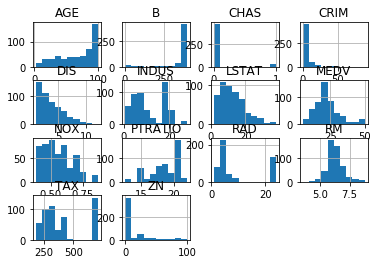

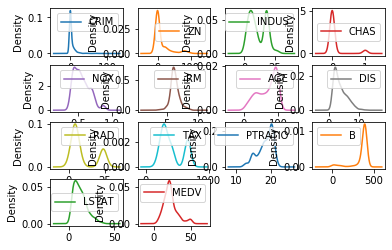

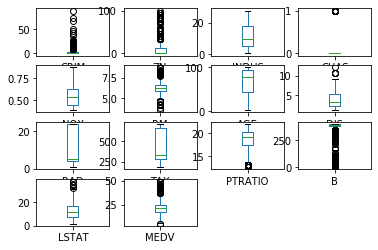

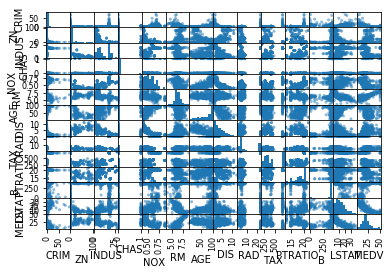

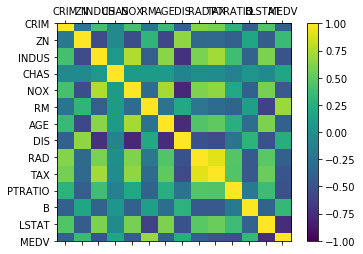

In [4]:
# Data visualizations

# histograms
dataset.hist()
plt.show()
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
plt.show()
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

# scatter plot matrix
scatter_matrix(dataset)
plt.show()
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [5]:
# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [62]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'neg_mean_squared_error'

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [63]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -24.861721 (11.880639)
SVR: -85.518342 (31.994798)


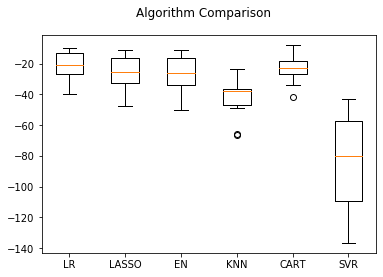

In [8]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [9]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -23.542141 (10.945511)
ScaledSVR: -29.633086 (17.009186)


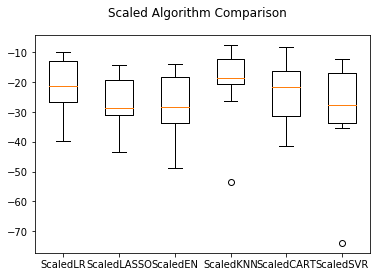

In [10]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [37]:
model = LinearRegression()
model.fit(rescaledX, Y_train)
predictions=model.predict(rescaledX)
print(mean_squared_error(Y_train, predictions))

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))


19.638717311375427
34.05648134887461


In [11]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# for params, mean_score, scores in grid_result.grid_scores_:
#     print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))
    
for means,stdev,neighbors in zip(grid_result.cv_results_['mean_test_score'],grid_result.cv_results_['std_test_score'],grid_result.cv_results_['params']):
    print(round(means, 6),round(stdev,6),neighbors)    

Best: -18.172137 using {'n_neighbors': 3}
-20.208663 15.029652 {'n_neighbors': 1}
-18.172137 12.95057 {'n_neighbors': 3}
-20.131163 12.203697 {'n_neighbors': 5}
-20.575845 12.345886 {'n_neighbors': 7}
-20.368264 11.621738 {'n_neighbors': 9}
-21.009204 11.610012 {'n_neighbors': 11}
-21.151809 11.943318 {'n_neighbors': 13}
-21.5574 11.536339 {'n_neighbors': 15}
-22.789938 11.566861 {'n_neighbors': 17}
-23.871873 11.340389 {'n_neighbors': 19}
-24.361362 11.914786 {'n_neighbors': 21}


In [36]:
model = KNeighborsRegressor(n_neighbors= 3)
model.fit(rescaledX, Y_train)
predictions=model.predict(rescaledX)
print(mean_squared_error(Y_train, predictions))

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))


8.324496699669966
33.187407407407406


In [20]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

import numpy as np
n_samples, n_features = 10, 5
np.random.seed(0)
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(rescaledX, Y_train)
clf.best_params_

{'C': 1.5, 'epsilon': 0.2, 'gamma': 1e-07, 'kernel': 'linear'}

In [34]:
model = SVR(C= 1.5, epsilon= 0.2, gamma= 1e-07, kernel= 'linear')
model.fit(rescaledX, Y_train)
predictions=model.predict(rescaledX)
print(mean_squared_error(Y_train, predictions))

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))



21.614851288568367
40.784076535329476


In [12]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -15.346371 (6.716782)
ScaledGBM: -10.206454 (4.673776)
ScaledRF: -15.118572 (7.945807)
ScaledET: -9.952013 (5.301355)


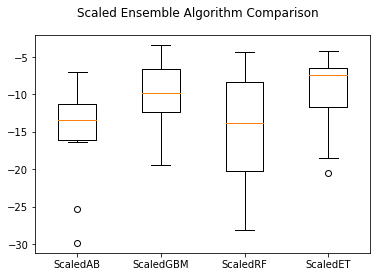

In [13]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [42]:
classifier = RandomForestRegressor()

param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }




In [51]:
from sklearn.model_selection import GridSearchCV

gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=param_grid,
                     scoring='mean_squared_error',
                     cv=5,
                     n_jobs=-1)

grid = GridSearchCV(classifier, param_grid, n_jobs=-1, cv=5)

grid.fit(X_train, Y_train)

print(grid.best_score_ )
print(grid.best_params_)




0.8842117169639948
{'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 20}


In [65]:
model = RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_split=2, n_estimators= 20)
model.fit(rescaledX, Y_train)
model.feature_importances_

predictions=model.predict(rescaledX)
print(mean_squared_error(Y_train, predictions))

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions1 = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions1))




feature_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = feature_columns,
                                                                       columns=['importance']).sort_values('importance', ascending=False)

feature_importances 





2.1875000000003303e-05
17.270797549019612


,importance
RM,3.15e-01
LSTAT,2.20e-01
NOX,1.02e-01
INDUS,9.57e-02
CRIM,5.18e-02
PTRATIO,4.99e-02
DIS,4.68e-02
TAX,3.41e-02
AGE,2.48e-02
B,2.13e-02


In [68]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,6.26e-02,0.0,11.93,0,0.57,6.59,69.1,2.48,1,273.0,21.0,391.99,9.67,22.4
502,4.53e-02,0.0,11.93,0,0.57,6.12,76.7,2.29,1,273.0,21.0,396.90,9.08,20.6
503,6.08e-02,0.0,11.93,0,0.57,6.98,91.0,2.17,1,273.0,21.0,396.90,5.64,23.9
504,1.10e-01,0.0,11.93,0,0.57,6.79,89.3,2.39,1,273.0,21.0,393.45,6.48,22.0


In [82]:
# Run the Regression with selected variables

# selectibnf required variables

cols = [col for col in dataset .columns if col in ['RM','LSTAT','NOX','INDUS','CRIM']]
datset1 = dataset[cols]
y = dataset.iloc[:, 13]

X_train, X_validation, Y_train, Y_validation = train_test_split(datset1, y ,test_size=0.2, random_state=7)

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)


model = LinearRegression()
model.fit(rescaledX, Y_train)
predictions=model.predict(rescaledX)
print(mean_squared_error(Y_train, predictions))

# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))



26.827332879252783
44.43944700502039


In [14]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# for params, mean_score, scores in grid_result.grid_scores_:
#     print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))
    
for means,stdev,neighbors in zip(grid_result.cv_results_['mean_test_score'],grid_result.cv_results_['std_test_score'],grid_result.cv_results_['params']):
    print(round(means, 6),round(stdev,6),neighbors)       

Best: -9.353870 using {'n_estimators': 400}
-10.812167 4.724394 {'n_estimators': 50}
-10.040857 4.441758 {'n_estimators': 100}
-9.694045 4.275653 {'n_estimators': 150}
-9.539481 4.270153 {'n_estimators': 200}
-9.449042 4.26193 {'n_estimators': 250}
-9.426909 4.271399 {'n_estimators': 300}
-9.366779 4.251669 {'n_estimators': 350}
-9.35387 4.265816 {'n_estimators': 400}


In [15]:
# Make predictions on validation dataset

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.878916447820348
